<a href="https://colab.research.google.com/github/fahmidjobbi/TP-COLLAB/blob/main/TPAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,Dense
from keras.models import Model
from keras.optimizers import RMSprop
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train=x_train.astype('float32')/255.0

x_test=x_test.astype('float32')/255.0

print(x_test[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(x_train.shape[0])
print(x_train.shape[1])
print(x_train.shape[2])

60000
28
28


In [ ]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test1=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])







In [ ]:
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


In [ ]:
Input_size = 784

Number_Neuron_Hidden_Layer =128  # 128

code_size = 32 #32

 

Input_Layer = Input(shape=(Input_size))

Hidden_Encoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(Input_Layer)

code = Dense(code_size, activation='relu')(Hidden_Encoder)

Hidden_Decoder = Dense(Number_Neuron_Hidden_Layer, activation='relu')(code)

Output_Layer = Dense(Input_size, activation='sigmoid')(Hidden_Decoder) # Output should be between 0 and 1 as the input : normalization

 

autoencoder = Model(Input_Layer, Output_Layer)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train1, x_train1, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1355
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0985
Epoch 3/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0935


In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
image_prediction_test = autoencoder.predict(x_test1)
image_prediction_train= autoencoder.predict(x_train1) 

1875/1875 [==============================] - 6s 3ms/step


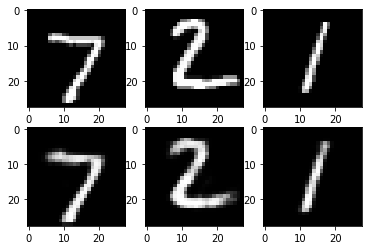

In [ ]:
import matplotlib.pyplot as plt 
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
for i in range (0,3):
  plt.subplot(2,3,i+1)
  plt.imshow(x_test1[i].reshape((28,28)),'gray')
  plt.subplot(2,3,i+4)
  plt.imshow(image_prediction_test[i].reshape(28,28),'gray')
